In [1]:
# Non-Linear Polynomial Regression Model:
#File is under section 6 ('Position Salaries') - 3 columns (position, level, salary)

#this would be used in HR department
#We're dealing with someone who wants to be a regional manager who previously has been one elsewhwere for 2+ years so he will need to earn between 150-200k = a level of 6.5
# we want to use the model to see where he'd best fit money wise



In [3]:
#Import the Necessary Libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tkinter import Tk, filedialog

#Read Data in:
RAW_Data = filedialog.askopenfilename(title="Select CSV file", filetypes=[("CSV files", "*.csv")])
#We're doing an analysis on Audi customers
Data = pd.read_csv(RAW_Data) #read in file 'Data.csv' 
#Now we'd need to look at what are the features, and what is the dependent variable vector based on our data set
    #features are our predecitive measures: i.e., country, age, and salary
    #our dependent variable is S-Line purchases - usually is the last column
X = Data.iloc[:, 1:-1].values # mean get all values except ones in last column (our predictive measures)
y = Data.iloc[:,-1].values # gets values for last column! Will they buy, yes or no.
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [4]:
#Training a Linear Regression Model on the WHOLE DATA SET:

from sklearn.linear_model import LinearRegression
Lin_Regressor = LinearRegression()
Lin_Regressor.fit(X, y) #expects couple of X and Y



LinearRegression()

In [10]:
#Training the Polynomial Regression Model on WHOLE DATA SET:
#we have to create a matirx of features (i.e., x1, x1^2, x1^n)
from sklearn.preprocessing import PolynomialFeatures
Poly_Regressor = PolynomialFeatures(degree=4) #degree = number of n - the higher the number the more fine-tuned generally
X_Poly = Poly_Regressor.fit_transform(X)

Lin_Regressor_2 = LinearRegression()
Lin_Regressor_2.fit(X_Poly, y)



LinearRegression()

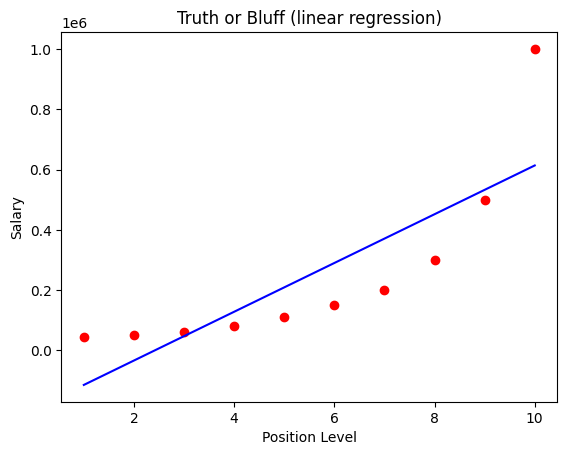

In [11]:
#Visualing the Linear Regression Results:
plt.scatter(X, y, color = 'red')
plt.plot(X, Lin_Regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (linear regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()



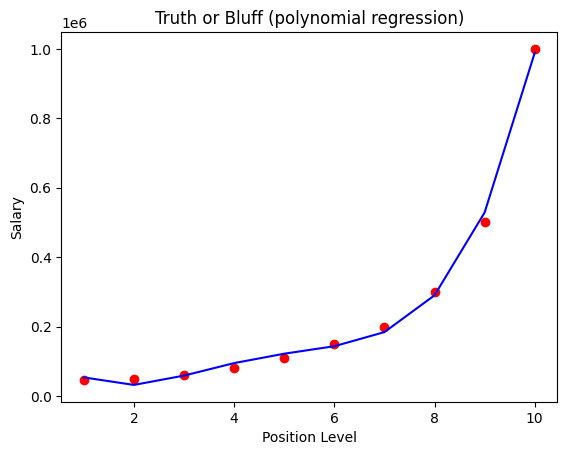

In [12]:
#Visualing Polynomial Regression Model:
plt.scatter(X, y, color = 'red')
plt.plot(X, Lin_Regressor_2.predict(X_Poly), color = 'blue')
plt.title('Truth or Bluff (polynomial regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()



C:\Users\ethan\AppData\Local\Temp\ipykernel_8216\3740951947.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


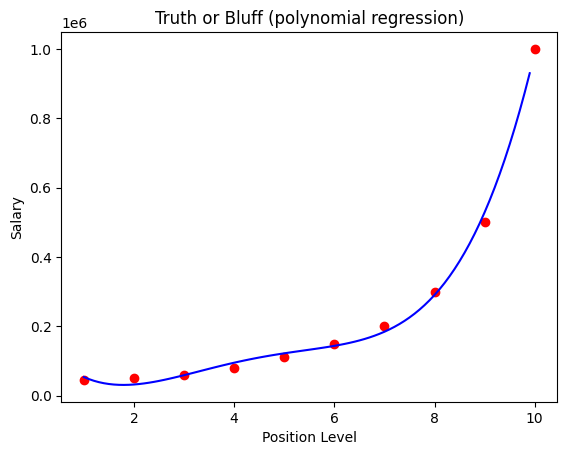

In [15]:
#This graph above is a little rough looking, let's smooth out the predictive curve:
#Visualing the Polynomial Regression Results (for Higher Resolution and Smoother Curve)

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color = 'red')
plt.plot(X_grid, (Lin_Regressor_2.predict(Poly_Regressor.fit_transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (polynomial regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [21]:
#Predict this salary of 6.5: 

#if we predict using simple linear regression, we get:
Lin_Regressor.predict([[6.5]]) #they asked originally for 160k salary


array([330378.78787879])

In [22]:

#if we use our Polynomial Regression, we get:
Lin_Regressor_2.predict(Poly_Regressor.fit_transform([[6.5]]))


array([158862.45265155])